In [ ]:
!pip install pandas scikit-learn nltk


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techykajal/fakereal-news")

print("Path to dataset files:", path)


100%|██████████| 844k/844k [00:00<00:00, 81.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/techykajal/fakereal-news/versions/1


In [ ]:
# Load dataset from sample_data folder, specifying the encoding
df = pd.read_csv('/content/sample_data/New Task.csv', encoding='latin-1') # Try 'latin-1' or 'cp1252' if 'latin-1' doesn't work.

# Preview the first few rows
df.head()

,News_Headline,Link_Of_News,Source,Stated_On,Date,Label
0,Says Osama bin Laden endorsed Joe Biden,https://www.politifact.com/factchecks/2020/jun...,Donald Trump Jr.,"June 18, 2020","June 19, 2020",FALSE
1,CNN aired a video of a toddler running away fr...,https://www.politifact.com/factchecks/2020/jun...,Donald Trump,"June 18, 2020","June 19, 2020",pants-fire
2,Says Tim Tebow kneeled in protest of abortion...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 12, 2020","June 19, 2020",FALSE
3,Even so-called moderate Democrats like Joe Bi...,https://www.politifact.com/factchecks/2020/jun...,Paul Junge,"June 10, 2020","June 19, 2020",barely-true
4,"""Our health department, our city and our count...",https://www.politifact.com/factchecks/2020/jun...,Jeanette Kowalik,"June 14, 2020","June 18, 2020",TRUE


In [ ]:
df.columns


Index(['News_Headline', 'Link_Of_News', 'Source', 'Stated_On', 'Date',
       'Label'],
      dtype='object')

In [ ]:
# Load dataset from sample_data folder, specifying the encoding
df = pd.read_csv('/content/sample_data/New Task.csv', encoding='latin-1') # Try 'latin-1' or 'cp1252' if 'latin-1' doesn't work.

# Preview the first few rows
df.head()

# Print the actual column names to identify the correct ones
print(df.columns)

# Check for null values and drop if any
# Replace 'text' and 'label' with the actual column names from the output above
df = df[['News_Headline', 'Link_Of_News', 'Source', 'Stated_On', 'Date',
       'Label']].dropna() # Assuming 'News_Headline' and 'News_Article' are your desired columns

# Optional: Shuffle the data to ensure random distribution
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Preview sample data
df.head()

# Rename the columns to 'text' and 'label' if needed
df = df.rename(columns={'News_Headline': 'text', 'News_Article': 'label'})

Index(['News_Headline', 'Link_Of_News', 'Source', 'Stated_On', 'Date',
       'Label'],
      dtype='object')


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean each text
def clean_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'^b\s+', '', text)
    text = text.lower()
    return ' '.join([word for word in text.split() if word not in stop_words])

# Apply to dataset
df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the data
# Replace 'label' with 'Label' (the actual column name in your DataFrame)
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['Label'], test_size=0.2, random_state=42
)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_df=0.7)
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)


In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Train Passive Aggressive Classifier
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(tfidf_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


PassiveAggressiveClassifier(max_iter=50)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict on test data
y_pred = model.predict(tfidf_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

# Confusion Matrix
# Get unique labels from y_test
unique_labels = np.unique(y_test)

# Print unique labels to see the actual values in your target variable
print("Unique labels in y_test:", unique_labels)

# Create confusion matrix using unique labels
conf_mat = confusion_matrix(y_test, y_pred, labels=unique_labels)
print("Confusion Matrix:\n", conf_mat)

Accuracy: 24.8%
Unique labels in y_test: ['FALSE' 'TRUE' 'barely-true' 'full-flop' 'half-flip' 'half-true'
 'mostly-true' 'no-flip' 'pants-fire']
Confusion Matrix:
 [[126  42  84   0   0  64  69   0  68]
 [ 41  33  35   0   0  29  49   0  15]
 [ 66  28  90   1   1  72  49   0  29]
 [  5   0   2   3   0   3   1   0   0]
 [  2   1   2   1   0   0   0   0   1]
 [ 59  28  67   1   0  71  82   1  29]
 [ 68  48  65   1   0  61  83   1  29]
 [  0   0   1   1   0   0   0   0   0]
 [ 81  20  30   0   1  27  35   2  88]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-23-261764077fa0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette='Set2')


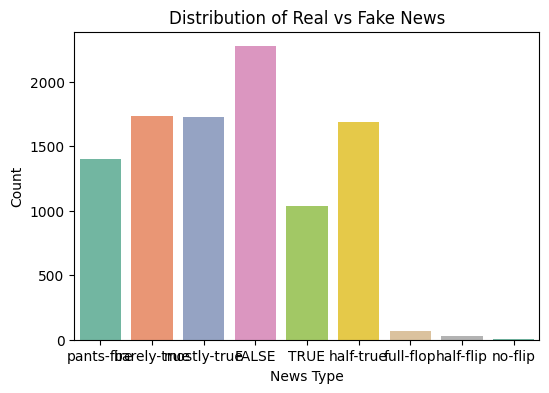

In [ ]:
plt.figure(figsize=(6, 4))
# Change 'label' to 'Label' to match the actual column name
sns.countplot(data=df, x='Label', palette='Set2')
plt.title('Distribution of Real vs Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

<ipython-input-25-a2c008e2ed1a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette='Set2')


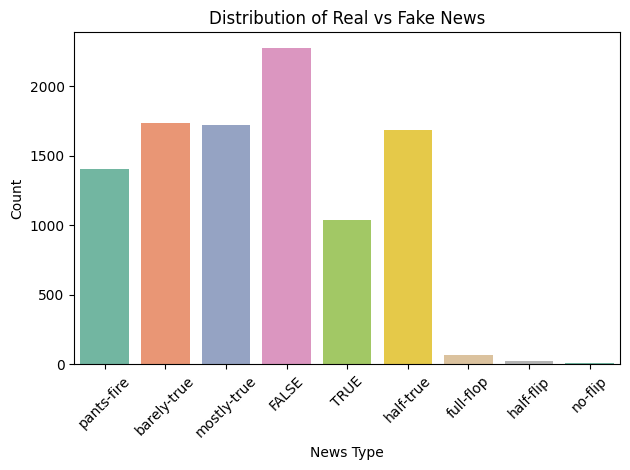

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correct the column name to 'Label'
sns.countplot(data=df, x='Label', palette='Set2')
plt.title('Distribution of Real vs Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()       # Adjust layout to prevent cutoff
plt.show()

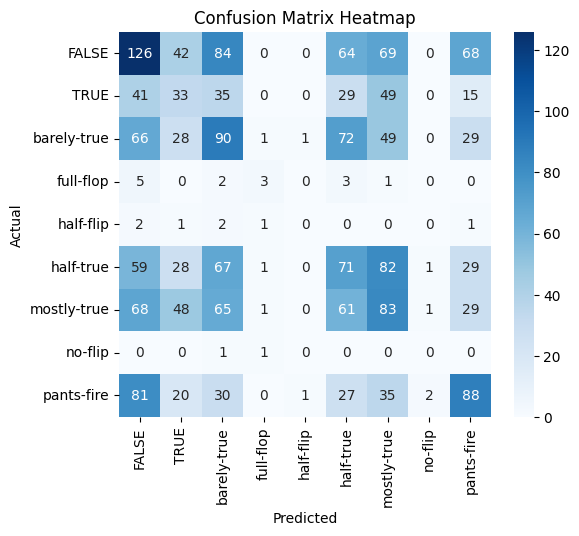

In [ ]:
# Get the unique labels from your target variable (y_test or y_train)
unique_labels = np.unique(y_test)

# Create the DataFrame for the confusion matrix using the unique labels
conf_df = pd.DataFrame(conf_mat, index=unique_labels, columns=unique_labels)

# Continue with your heatmap plotting code
plt.figure(figsize=(6, 5))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Model classes: ['FALSE' 'TRUE' 'barely-true' 'full-flop' 'half-flip' 'half-true'
 'mostly-true' 'no-flip' 'pants-fire']


<ipython-input-29-363fbf30bc4f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette='coolwarm')


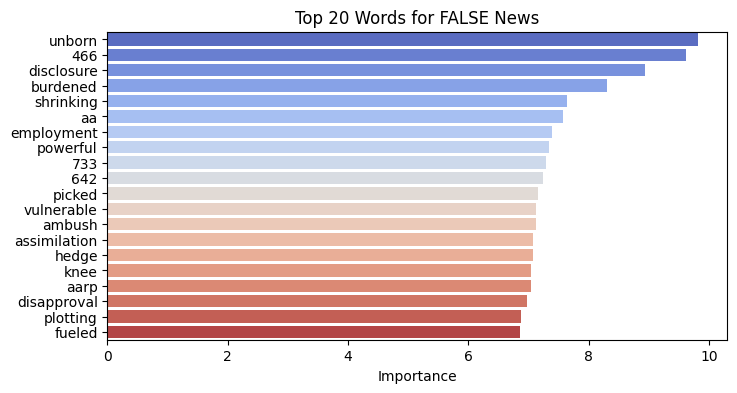

<ipython-input-29-363fbf30bc4f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette='coolwarm')


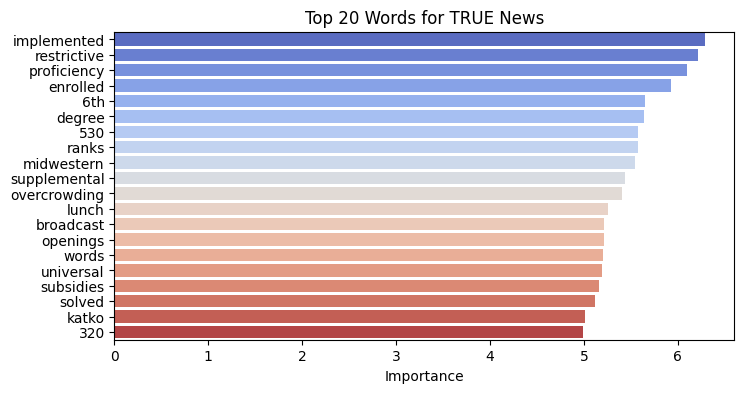

In [ ]:
def show_top_words(vectorizer, model, class_label, top_n=20):
    feature_names = vectorizer.get_feature_names_out()
    # Get the actual class labels from the model
    class_labels = model.classes_
    # Check if the provided class_label is in the model's classes
    if class_label in class_labels:
        class_index = list(class_labels).index(class_label)
        top_indices = model.coef_[class_index].argsort()[::-1][:top_n]
        top_features = [feature_names[i] for i in top_indices]
        top_scores = model.coef_[class_index][top_indices]

        plt.figure(figsize=(8, 4))
        sns.barplot(x=top_scores, y=top_features, palette='coolwarm')
        plt.title(f"Top {top_n} Words for {class_label} News")
        plt.xlabel("Importance")
        plt.show()
    else:
        print(f"Class label '{class_label}' not found in model classes: {class_labels}")

# Show for FAKE and REAL (or the actual labels in your dataset)
# Print the model's classes to check the actual labels
print("Model classes:", model.classes_)

# Call show_top_words with the correct class labels
# For example, if your labels are 'fake' and 'real', use:
show_top_words(vectorizer, model, model.classes_[0])  # Assuming 'fake' is the first class
show_top_words(vectorizer, model, model.classes_[1])  # Assuming 'real' is the second class
